In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import warnings
warnings.simplefilter("ignore")

In [43]:
df=pd.read_csv("fashion-mnist_train.csv")

In [44]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df.shape

(60000, 785)

In [46]:
df=df.sample(frac=0.3).reset_index(drop=True)

In [47]:
df.shape

(18000, 785)

In [48]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,164,184,72,0,3,0,0,0,0,0


In [49]:
LOOKUP={ 0:  'T-Shirt',
         1:  'Trouser',
         2:  'Pullover',
         3:  'Dress',
         4:   'Coat',
         5:   'Sandal',
         6:   'Shirt',
         7:   'Sneaker',
         8:    'Bag',
         9:    'Ankle boot'
    
}

In [50]:
def display_image(features, actual_label):
    print("Actual label",LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [51]:
x=df[df.columns[1:]]
y=df['label']

In [52]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,164,184,72,0,3,0,0,0,0,0


In [53]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,9,...,164,184,72,0,3,0,0,0,0,0


In [54]:
y.head()

0    9
1    3
2    8
3    5
4    0
Name: label, dtype: int64

In [55]:
x.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   2,   0,   0,  94, 150, 130,  75, 190,
       136, 141, 163, 132, 146,  74,  54,  28,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0, 119, 174, 125,  78,
        65,   6,  26,  54,  57,  15,  97,  75,  65, 196,  94,   0,   4,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0, 110, 112,
         0,   5,  19,  27,  46,  51,  27,  35,  24,  59,  41,  43, 135,
         0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
       129, 189, 118,  10,  11,  22,  29,  44,  27], dtype=int64)

In [56]:
y.loc[5]

4

Actual label Coat


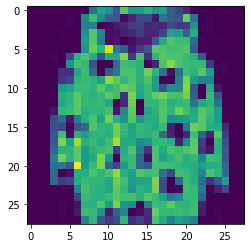

In [57]:
display_image(x.loc[5].values,y.loc[5])

Actual label Trouser


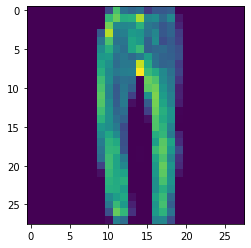

In [58]:
display_image(x.loc[15].values,y.loc[15])

Actual label Sandal


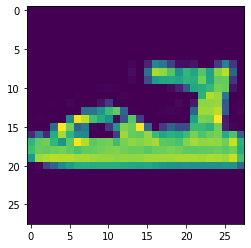

In [59]:
display_image(x.loc[1000].values,y.loc[1000])

In [60]:
x=x/255
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035294,...,0.643137,0.721569,0.282353,0.0,0.011765,0.0,0.0,0.0,0.0,0.0


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [62]:
x_train.shape,y_train.shape

((14400, 784), (14400,))

In [63]:
x_test.shape,y_test.shape

((3600, 784), (3600,))

In [64]:
def summarize_classification(y_test,y_pred,avg_method="weighted"):
    acc=accuracy_score(y_test,y_pred,normalize=True)
    num_acc=accuracy_score(y_test,y_pred,normalize=False)
    precision=precision_score(y_test,y_pred,average="weighted")
    recall=recall_score(y_test,y_pred,average="weighted")
    print("Test Data count:",len(y_test))
    print("accuracy count:",num_acc)
    print("accuracy score:",acc)
    print("precision:",precision)
    print("recall:",recall)

In [65]:
logistic_regression=LogisticRegression(solver="sag",multi_class="auto",max_iter=10000).fit(x_train,y_train)

In [66]:
y_pred=logistic_regression.predict(x_test)
y_pred

array([5, 6, 0, ..., 3, 5, 3], dtype=int64)

In [67]:
summarize_classification(y_test,y_pred)

Test Data count: 3600
accuracy count: 3015
accuracy score: 0.8375
precision: 0.8385638282736564
recall: 0.8375


In [68]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[281,   2,   5,  16,   3,   0,  36,   1,   5,   0],
       [  1, 339,   0,  10,   2,   0,   2,   0,   0,   0],
       [ 11,   1, 280,   4,  52,   1,  36,   0,   4,   0],
       [ 13,   3,   8, 286,   8,   0,  13,   0,   1,   0],
       [  2,   0,  29,   9, 260,   0,  29,   0,   4,   0],
       [  1,   0,   0,   2,   0, 348,   0,  12,   1,  10],
       [ 63,   0,  30,  11,  40,   0, 218,   0,   7,   0],
       [  0,   0,   0,   0,   0,  17,   0, 300,   1,  15],
       [  2,   0,   5,   5,   4,   4,  16,   1, 380,   0],
       [  0,   0,   0,   0,   0,  10,   0,  17,   0, 323]], dtype=int64)

In [69]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)


In [70]:
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [71]:
y_pred=classifier.predict(x_test)
y_pred

array([5, 6, 0, ..., 3, 5, 3], dtype=int64)

In [72]:
summarize_classification(y_test,y_pred)

Test Data count: 3600
accuracy count: 3049
accuracy score: 0.8469444444444445
precision: 0.8474096027242235
recall: 0.8469444444444445


In [73]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[291,   0,   4,  12,   2,   1,  34,   0,   5,   0],
       [  3, 341,   4,   4,   0,   0,   2,   0,   0,   0],
       [  9,   0, 308,   2,  49,   0,  20,   0,   1,   0],
       [ 16,   5,   4, 286,  12,   0,   8,   0,   0,   1],
       [  5,   0,  35,  11, 266,   0,  15,   0,   1,   0],
       [  0,   0,   0,   0,   0, 352,   0,  14,   1,   7],
       [ 63,   0,  50,  10,  47,   0, 192,   0,   7,   0],
       [  0,   0,   0,   0,   0,  13,   0, 301,   0,  19],
       [  3,   1,   8,   5,   4,   1,   5,   0, 389,   1],
       [  0,   0,   0,   0,   0,   8,   0,  19,   0, 323]], dtype=int64)

In [79]:
vector = SVC(kernel='poly', random_state=0)  

In [80]:
vector.fit(x_train,y_train)

SVC(kernel='poly', random_state=0)

In [81]:
y_pred=vector.predict(x_test)
y_pred

array([5, 6, 0, ..., 3, 5, 3], dtype=int64)

In [82]:
summarize_classification(y_test,y_pred)

Test Data count: 3600
accuracy count: 3022
accuracy score: 0.8394444444444444
precision: 0.8462027142700151
recall: 0.8394444444444444


In [83]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[291,   1,   2,  10,   1,  17,  24,   0,   3,   0],
       [  4, 333,   0,  11,   1,   4,   1,   0,   0,   0],
       [ 11,   0, 293,   3,  39,  11,  30,   0,   2,   0],
       [ 18,   1,   5, 283,   8,   9,   7,   0,   0,   1],
       [  2,   0,  27,   8, 255,   5,  32,   0,   4,   0],
       [  1,   0,   0,   0,   0, 358,   0,  10,   2,   3],
       [ 62,   0,  23,   5,  21,  18, 236,   0,   4,   0],
       [  0,   0,   0,   0,   0,  38,   0, 284,   0,  11],
       [  8,   1,   6,   4,   1,  15,  11,   1, 370,   0],
       [  0,   0,   0,   0,   0,  18,   0,  13,   0, 319]], dtype=int64)